# 🏡 House Prices - Advanced Regression Techniques

## 📌 Objective
The goal of this competition is to predict the final price of homes based on various features such as size, neighborhood, quality, etc. This notebook demonstrates a full machine learning pipeline including data preprocessing, feature engineering, model comparison, and evaluation.

> ✅ Techniques: Exploratory Data Analysis (EDA), Feature Engineering, Tree-Based Models, Cross-Validation, Hyperparameter Tuning


## 📦 Import Libraries
Load all necessary libraries for data analysis, visualization, and modeling.

In [76]:
# Core packages
import pandas as pd
import numpy as np

# Visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Stats & utility
import scipy.stats as stats
from IPython.display import display, HTML

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set global plot style
sns.set_style("whitegrid")

# Load and Prepare Data

In [77]:
# Load the training dataset
df = pd.read_csv("../data/train.csv")

# Display first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
# Utility to render large DataFrames as scrollable HTML tables (for clean EDA display)
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html(classes='table table-striped')
    html += '</div>'
    return html

## 📊 Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand its structure,
distribution of features, and relationships to the target variable (`SalePrice`).

In [79]:
# Shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 1460 rows and 81 columns.


In [80]:
# Select numerical features for statistical analysis
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [81]:
# Summary statistics for numerical features
summary_stats = numerical_features.describe().T
summary_stats['missing'] = df[numerical_features.columns].isnull().sum()
summary_stats['missing_percent'] = 100 * summary_stats['missing'] / len(df)

html_numerical = create_scrollable_table(
    summary_stats.round(2),
    'numerical_features',
    '📈 Summary Statistics for Numerical Features'
)

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max,missing,missing_percent
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0,0,0.00
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0,0,0.00
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0,259,17.74
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0,0,0.00
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0,0,0.00
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0,0,0.00
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0,0,0.00
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0,0,0.00
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0,8,0.55
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0,0,0.00


In [82]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
cat_summary_stats['missing'] = df[categorical_features.columns].isnull().sum()
cat_summary_stats['missing_percent'] = 100 * cat_summary_stats['missing'] / len(df)

html_categorical = create_scrollable_table(
    cat_summary_stats,
    'categorical_features',
    '🗂️ Summary Statistics for Categorical Features'
)

display(HTML(html_categorical))

,count,unique,top,freq,missing,missing_percent
MSZoning,1460,5,RL,1151,0,0.000000
Street,1460,2,Pave,1454,0,0.000000
Alley,91,2,Grvl,50,1369,93.767123
LotShape,1460,4,Reg,925,0,0.000000
LandContour,1460,4,Lvl,1311,0,0.000000
Utilities,1460,2,AllPub,1459,0,0.000000
LotConfig,1460,5,Inside,1052,0,0.000000
LandSlope,1460,3,Gtl,1382,0,0.000000
Neighborhood,1460,25,NAmes,225,0,0.000000
Condition1,1460,9,Norm,1260,0,0.000000


In [83]:
# Detailed missing value report
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = 100 * missing / len(df)

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percent Missing': missing_percent.round(2)
})

html_missing = create_scrollable_table(
    missing_df,
    'missing_values',
    '🚨 Missing Values Summary'
)

display(HTML(html_missing))

,Missing Values,Percent Missing
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


## 🎯 Explore the Target Variable: `SalePrice`

In this section, we examine the distribution and characteristics of the target variable.
Understanding its skewness and relationship with other variables helps inform model selection and feature engineering.


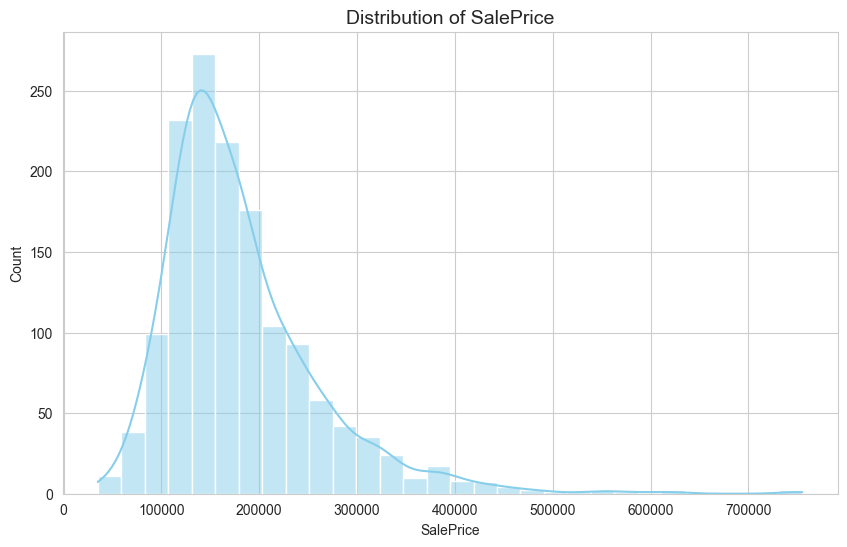

Skewness: 1.88
Kurtosis: 6.54


In [84]:
# Plot distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of SalePrice", fontsize=14)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

# Check skewness and kurtosis
print(f"Skewness: {df['SalePrice'].skew():.2f}")
print(f"Kurtosis: {df['SalePrice'].kurt():.2f}")

In [ ]:
# Notebook credit: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['SalePrice'])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df['SalePrice'], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='purple'))

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create a Q-Q plot
qq_data = stats.probplot(df['SalePrice'], dist="norm")
qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1], labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, color_discrete_sequence=["purple"])
qq_fig.update_layout(
    title="Q-Q plot",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green"))

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()

### 📌 Top Features Correlated with SalePrice

Top correlated features:
 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


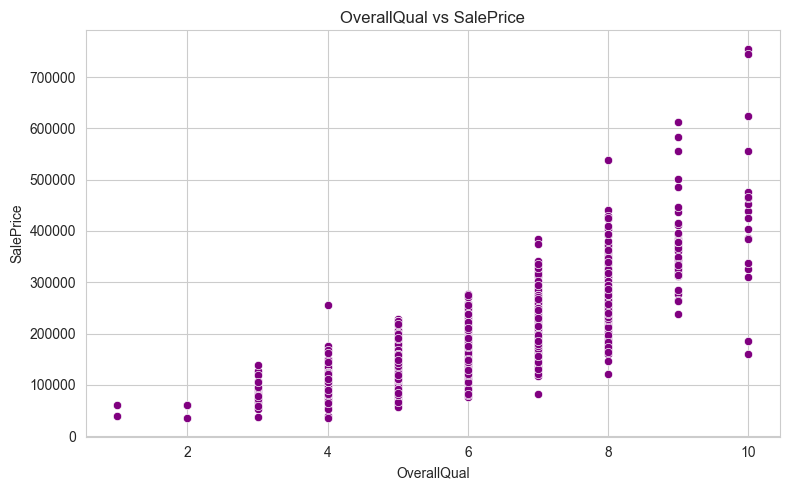

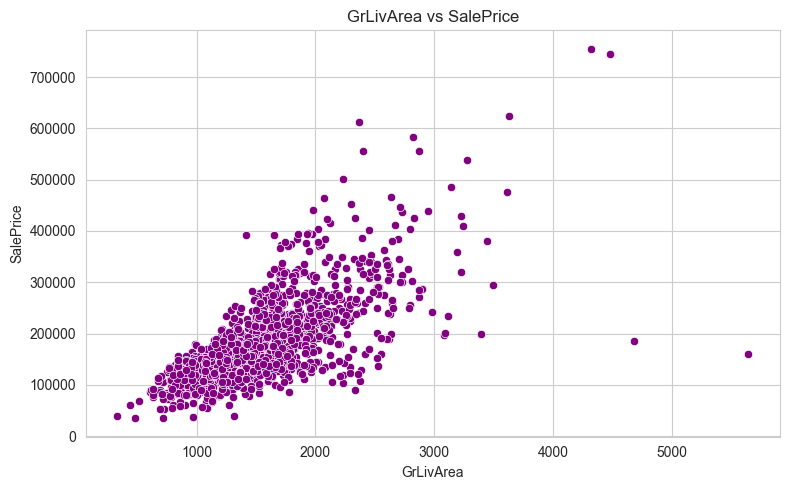

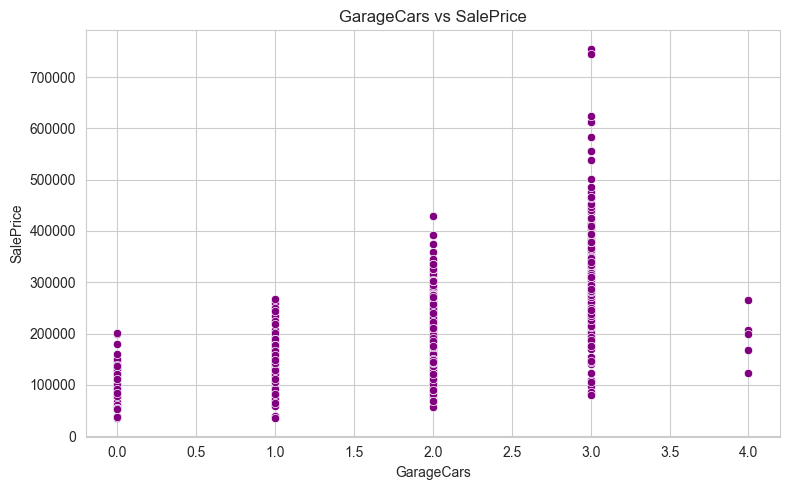

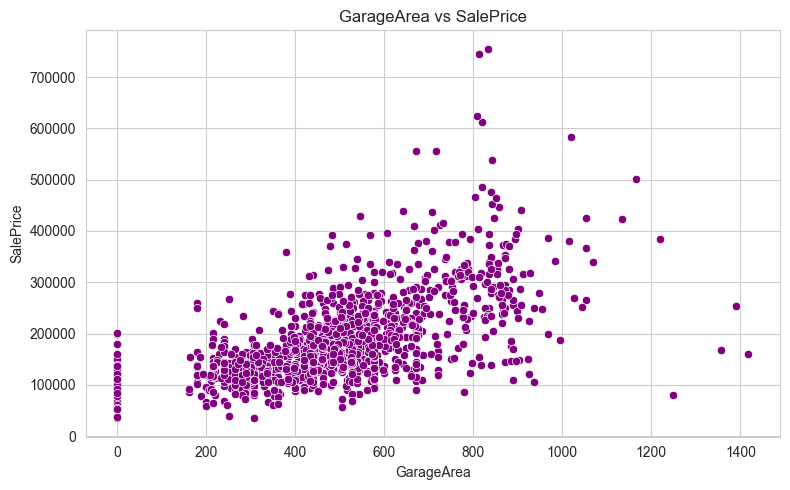

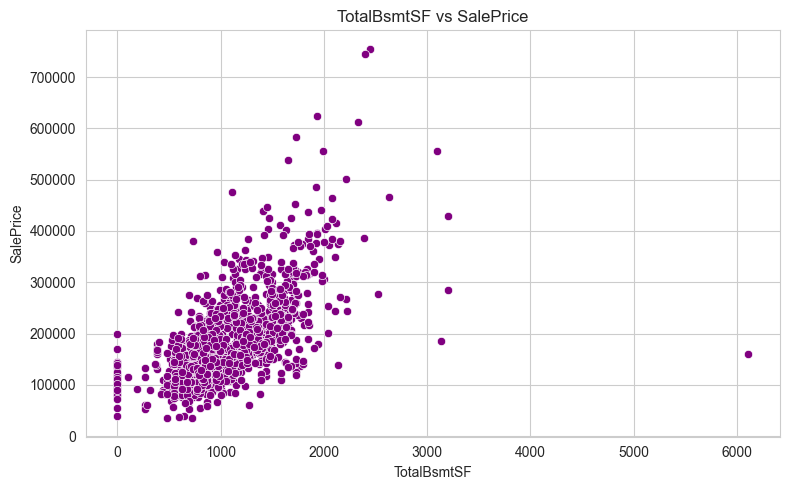

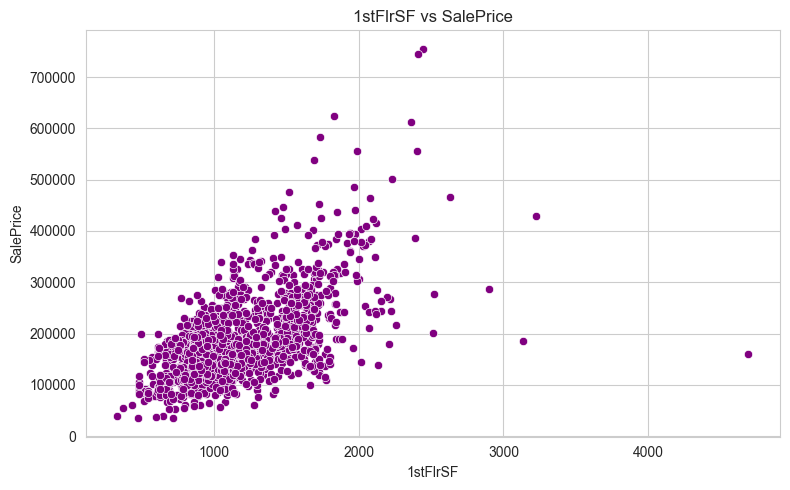

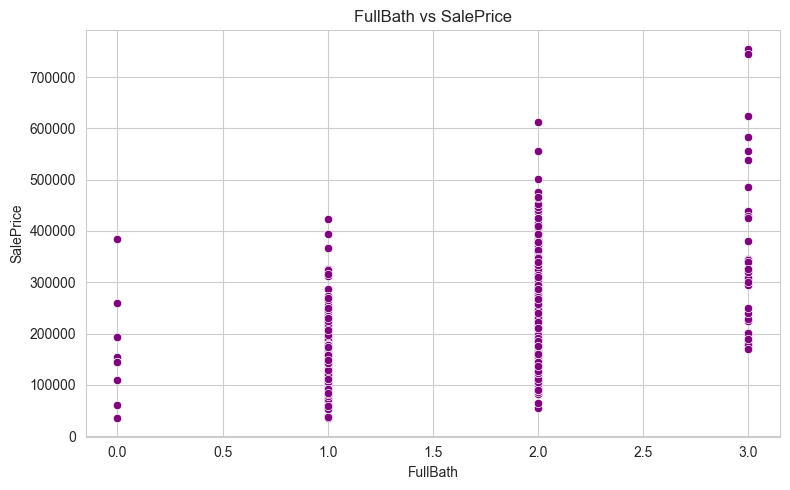

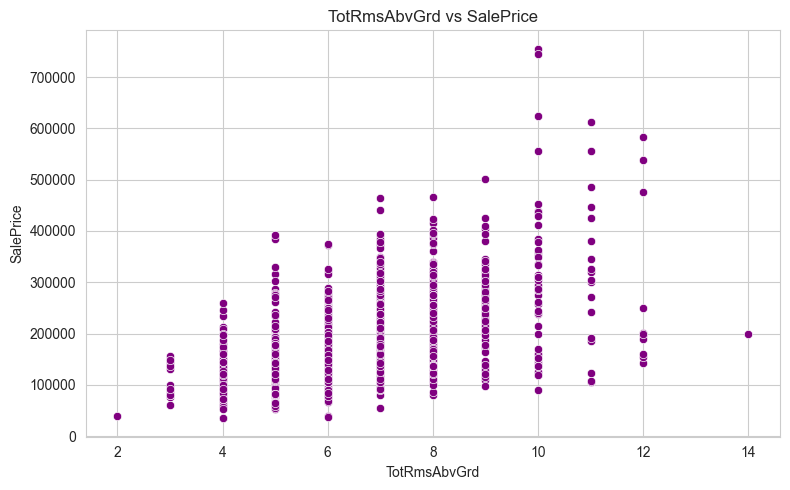

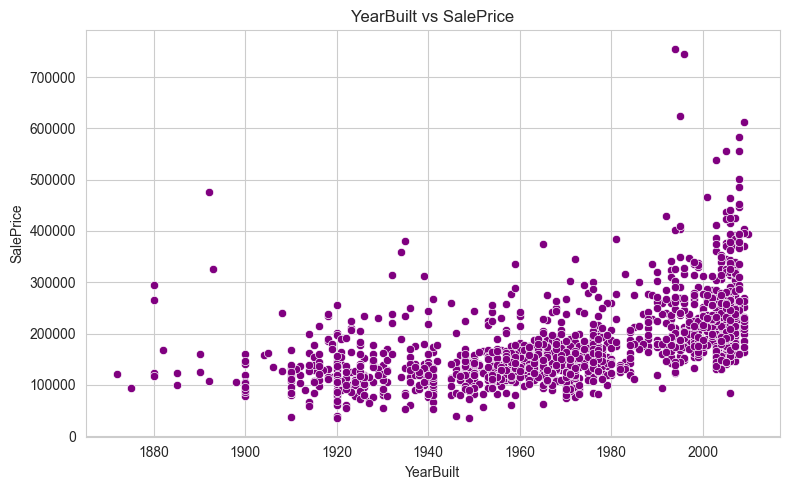

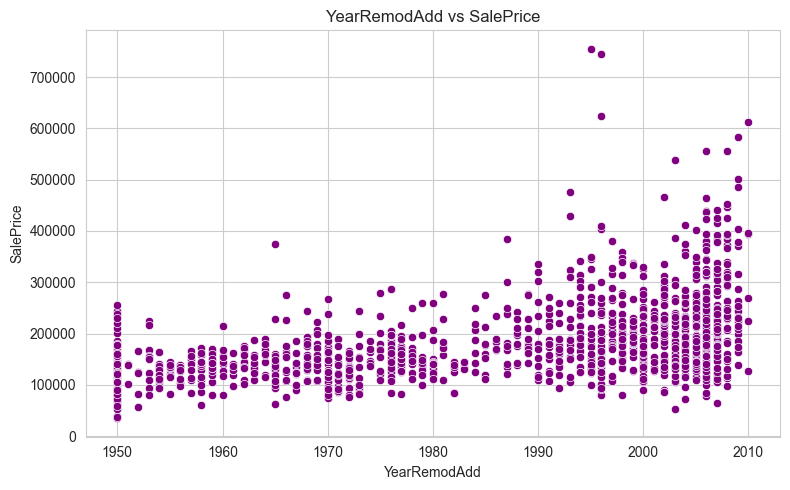

In [85]:
top_corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).head(11)[1:]
print("Top correlated features:\n", top_corr)

# Plot scatter plots for the top correlated features
for feature in top_corr.index:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['SalePrice'], color='purple')
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()


### 🏘️ Neighborhood Impact on SalePrice

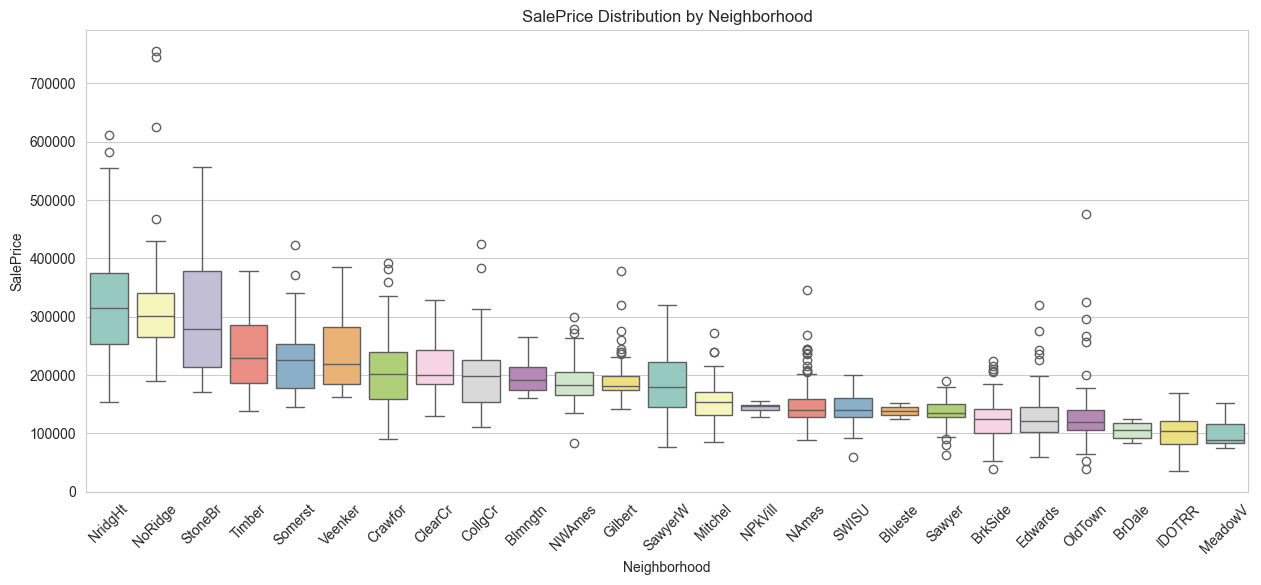

In [86]:
plt.figure(figsize=(15, 6))
order = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=order, palette='Set3')
plt.xticks(rotation=45)
plt.title("SalePrice Distribution by Neighborhood")
plt.ylabel("SalePrice")
plt.xlabel("Neighborhood")
plt.show()

## 🔍 Key Questions to Explore in the Data
Understanding what drives housing prices is critical for building an accurate predictive model. Below are the key business and analytical questions I aim to explore in this section:
 
1. What is the distribution of dwelling types, and how do they relate to sale prices?
2. Does residential zoning impact sale price?
3. Do street and alley access types influence sale price?
4. How does the property's physical shape and contour affect its market value?
5. Is there a correlation between property age and sale price?
6. How strongly is living area associated with sale price?
7. Do sale prices show any temporal trends over the years?


In [90]:
# 1. Distribution of Dwelling Types and Their Relation to Sale Prices
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Dwelling types distribution and average prices
dwelling_types = df['BldgType'].value_counts()
dwelling_prices = df.groupby('BldgType')['SalePrice'].mean()
formatted_dwelling_prices = ['$' + f'{value:,.0f}' for value in dwelling_prices.values]

fig1 = go.Figure([go.Bar(x=dwelling_types.index, y=dwelling_types.values,
                         text=dwelling_types.values, textposition='outside', 
                         marker=dict(color='rgb(76, 175, 80)', line=dict(color='black', width=2)))])
fig1.update_layout(title='Distribution of Dwelling Types', xaxis_title='Building Type', yaxis_title='Count')

fig2 = go.Figure([go.Bar(x=dwelling_prices.index, y=dwelling_prices.values,
                         text=formatted_dwelling_prices, textposition='outside',
                         marker=dict(color='rgb(156, 39, 176)', line=dict(color='black', width=2)))])
fig2.update_layout(title='Average Sale Price by Building Type', xaxis_title='Building Type', yaxis_title='Average Sale Price')

fig1.show()
fig2.show()

In [88]:
# 2. Zoning Impact on Sale Price
zoning_prices = df.groupby('MSZoning')['SalePrice'].mean()
fig3 = px.bar(x=zoning_prices.index, y=zoning_prices.values,
              text=zoning_prices.values, template='plotly_dark',
              title='Average Sale Price by Zoning',
              labels={'x': 'Zoning Type', 'y': 'Average Sale Price'})
fig3.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

fig3.show()

In [92]:
# 3. Street and Alley Access Effects
street_prices = df.groupby('Street')['SalePrice'].mean()
alley_prices = df.groupby('Alley')['SalePrice'].mean()

fig4 = px.bar(x=street_prices.index, y=street_prices.values,
              title='Average Sale Price by Street Type',
              text=street_prices.values, template='plotly_dark',
              labels={'x': 'Street Type', 'y': 'Average Sale Price'})
fig4.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

fig5 = px.bar(x=alley_prices.index, y=alley_prices.values,
              title='Average Sale Price by Alley Type',
              text=alley_prices.values, template='plotly_dark',
              labels={'x': 'Alley Type', 'y': 'Average Sale Price'})
fig5.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

fig4.show()
fig5.show()

In [94]:
# 4. Property Shape and Contour Analysis
shape_prices = df.groupby('LotShape')['SalePrice'].mean()
contour_prices = df.groupby('LandContour')['SalePrice'].mean()

fig6 = px.bar(x=shape_prices.index, y=shape_prices.values,
              title='Average Sale Price by Property Shape',
              text=shape_prices.values, template='plotly_dark',
              labels={'x': 'Property Shape', 'y': 'Average Sale Price'})
fig6.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

fig7 = px.bar(x=contour_prices.index, y=contour_prices.values,
              title='Average Sale Price by Land Contour',
              text=contour_prices.values, template='plotly_dark',
              labels={'x': 'Land Contour', 'y': 'Average Sale Price'})
fig7.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

fig6.show()
fig7.show()


In [95]:
# 5. Correlation Between Property Age and Sale Price
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']
age_corr = df['PropertyAge'].corr(df['SalePrice'])
print(f"Correlation between Property Age and Sale Price: {age_corr:.2f}")

fig8 = px.scatter(df, x='PropertyAge', y='SalePrice', title='Property Age vs Sale Price',
                  color='PropertyAge', color_continuous_scale='Purples', template='plotly_dark')
fig8.show()

Correlation between Property Age and Sale Price: -0.52


In [96]:
# 6. Correlation Between Living Area and Sale Price
living_corr = df['GrLivArea'].corr(df['SalePrice'])
print(f"Correlation between Living Area and Sale Price: {living_corr:.2f}")

fig9 = px.scatter(df, x='GrLivArea', y='SalePrice', title='Living Area vs Sale Price',
                  color='GrLivArea', color_continuous_scale='Purples', template='plotly_dark')
fig9.show()

Correlation between Living Area and Sale Price: 0.71


In [97]:
# 7. Sale Price Trends Over Time
yearly_avg_price = df.groupby('YrSold')['SalePrice'].mean()

fig10 = px.box(df, x='YrSold', y='SalePrice', points=False,
               title='Sale Price Trends Over the Years', template='plotly_dark')
fig10.add_scatter(x=yearly_avg_price.index, y=yearly_avg_price.values,
                  mode='lines+markers', line=dict(color='purple', width=3), name='Average')

for year, value in yearly_avg_price.items():
    fig10.add_annotation(x=year, y=value, text=f"${value:,.0f}", showarrow=False,
                         font=dict(color='white'), bgcolor='rgba(128, 0, 128, 0.5)')

fig10.update_layout(xaxis_title='Year Sold', yaxis_title='Sale Price')
fig10.show()

# Data Pipeline

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

In [38]:
# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice']) #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

# Model Training & Parameter Tune Models

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1761656820032832

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, min_samples_split=5, 

In [42]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.22778267781613562


# Principal Component Analysis (PCA)

In [43]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_pca = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s[CV] END .................................................... total time=   0.0s

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.16397465970517505

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END max_depth=None, min_samples_split=2,

/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=500; total time=   3.5s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=200; total time=   0.9s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=200; total time=   0.8s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=500; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=500; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=500; total time=   0.9s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=500; total time=   1.0s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=200; total time=   1.2s
[CV] END ..learning_rate=0.3, max_depth=10, n_estimators=200; total time=   1.2s
[CV] END ..learning_rate=0.3

In [45]:
from sklearn.neural_network import MLPRegressor

X_train_scaled_pca = X_train_pca.copy()
X_test_scaled_pca = X_test_pca.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01, .1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp_pca = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_pca.fit(X_train_scaled_pca, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_pca.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_pca.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.2262411740833713


In [46]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))

LinearRegression: 0.13212453580847683
RandomForest: 0.14740705465925416
XGBoost: 0.13519734581188902


In [47]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_pca[i].predict(X_test_pca), y_test))))

LinearRegression: 0.1418448783257997
RandomForest: 0.15291172006740475
XGBoost: 0.1403878343604313


In [48]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp.predict(X_test_scaled),y_test))))

0.1668391027224059


In [49]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_pca.predict(X_test_scaled_pca),y_test))))

0.18316903202345722


# Feature Engineering

In [50]:
var_explore = df[['Fence','Alley','MiscFeature','PoolQC','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','LotFrontage','GarageYrBlt','MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','TotalBsmtSF']]

display(HTML(create_scrollable_table(var_explore, 'var_explore', 'List of Variables to Explore for Feature Engineering')))

,Fence,Alley,MiscFeature,PoolQC,FireplaceQu,GarageCond,GarageQual,GarageFinish,GarageType,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical,MSZoning,Utilities,Exterior1st,Exterior2nd,KitchenQual,Functional,SaleType,LotFrontage,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,TotalBsmtSF
0,NaN,NaN,NaN,NaN,NaN,TA,TA,RFn,Attchd,No,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,65.0,2003.0,196.0,1,0,2,548,856
1,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Gd,Unf,ALQ,TA,Gd,NaN,SBrkr,RL,AllPub,MetalSd,MetalSd,TA,Typ,WD,80.0,1976.0,0.0,0,1,2,460,1262
2,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Mn,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,68.0,2001.0,162.0,1,0,2,608,920
3,NaN,NaN,NaN,NaN,Gd,TA,TA,Unf,Detchd,No,Unf,ALQ,Gd,TA,NaN,SBrkr,RL,AllPub,Wd Sdng,Wd Shng,Gd,Typ,WD,60.0,1998.0,0.0,1,0,3,642,756
4,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Av,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,84.0,2000.0,350.0,1,0,3,836,1145
5,MnPrv,NaN,Shed,NaN,NaN,TA,TA,Unf,Attchd,No,Unf,GLQ,TA,Gd,NaN,SBrkr,RL,AllPub,VinylSd,VinylSd,TA,Typ,WD,85.0,1993.0,0.0,1,0,2,480,796
6,NaN,NaN,NaN,NaN,Gd,TA,TA,RFn,Attchd,Av,Unf,GLQ,TA,Ex,Stone,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,75.0,2004.0,186.0,1,0,2,636,1686
7,NaN,NaN,Shed,NaN,TA,TA,TA,RFn,Attchd,Mn,BLQ,ALQ,TA,Gd,Stone,SBrkr,RL,AllPub,HdBoard,HdBoard,TA,Typ,WD,NaN,1973.0,240.0,1,0,2,484,1107
8,NaN,NaN,NaN,NaN,TA,TA,Fa,Unf,Detchd,No,Unf,Unf,TA,TA,NaN,FuseF,RM,AllPub,BrkFace,Wd Shng,TA,Min1,WD,51.0,1931.0,0.0,0,0,2,468,952
9,NaN,NaN,NaN,NaN,TA,TA,Gd,RFn,Attchd,No,Unf,GLQ,TA,TA,NaN,SBrkr,RL,AllPub,MetalSd,MetalSd,TA,Typ,WD,50.0,1939.0,0.0,1,0,1,205,991


In [51]:
from sklearn.preprocessing import FunctionTransformer

# feature engineering functions 
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)
    
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)


In [52]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])


# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

In [53]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_fe[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_fe[model_name].fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s[CV] END .................................................... total time=   0.0s

[CV] END .................................................... total time=   0.0s
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.16437385191936468

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END max_depth=None, min_samples_split=5,

/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time=   3.3s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=500; total time=   3.3s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=500; total time=   0.9s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=500; total time=   3.5s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=200; total time=   0.7s
[CV] END ...learning_rate=0.

In [54]:
X_train_scaled_fe = X_train_fe.copy()
X_test_scaled_fe = X_test_fe.copy()

# Create an MLPRegressor instance
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (10, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [.1, .5, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.1]
}

# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search_mlp_fe = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_fe.fit(X_train_scaled_fe, y_train_fe)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_fe.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_fe.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in 

Best parameters found:  {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}
Test score:  0.1273122342144034


/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


326 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jordynojeda/Documents/Kaggle-Competitions/kaggle_environment/lib/python3.13/site-packages/sklearn/model_selection/_valid

In [55]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_fe[i].predict(X_test_fe), y_test))))

LinearRegression: 0.14033013339200937
RandomForest: 0.15192312408758946
XGBoost: 0.13602837086810815


In [56]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_fe.predict(X_test_scaled_fe),y_test))))

0.1346195338706465


In [57]:
df_test = pd.read_csv('../data/test.csv')

In [58]:
df_test_preprocessed = pipeline_fe.transform(df_test)

In [59]:
#xgboost submission
y_xgboost = np.exp(grids_fe['XGBoost'].predict(df_test_preprocessed))

df_xgboost_out = df_test[['Id']].copy()
df_xgboost_out['SalePrice'] = y_xgboost

#
df_xgboost_out.to_csv('submission_xgboost_new_features_normalized.csv', index=False)

In [60]:
#rf submission
y_rf = np.exp(grids_fe['RandomForest'].predict(df_test_preprocessed))

df_rf_out = df_test[['Id']].copy()
df_rf_out['SalePrice'] = y_rf

#
df_rf_out.to_csv('submission_rf_normalized.csv', index=False)

In [61]:
#mlp submission
y_mlp = np.exp(grid_search_mlp_fe.predict(df_test_preprocessed))

df_mlp_out = df_test[['Id']].copy()
df_mlp_out['SalePrice'] = y_mlp

df_mlp_out.to_csv('submission_mlp_normalized.csv', index=False)

In [62]:
y_avg_ens = (y_rf + y_xgboost + y_mlp)/3

#xgboost submission
df_avg_ens_out = df_test[['Id']].copy()
df_avg_ens_out['SalePrice'] = y_avg_ens

#
df_avg_ens_out.to_csv('submission_avg_ens_new_features_normalized.csv', index=False)

In [63]:
from sklearn.ensemble import StackingRegressor

grids_fe['MLP'] =   grid_search_mlp_fe

best_estimators = [(model_name, grid.best_estimator_) for model_name, grid in grids_fe.items()]

# Define the candidate meta-models
meta_models = {
    'MLP': MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3, learning_rate_init=0.001),
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each meta-model
meta_param_grids = {
    'MLP': {
        'final_estimator__hidden_layer_sizes': [(10,), (10, 10)],
        'final_estimator__activation': ['relu', 'tanh'],
        'final_estimator__solver': ['adam', 'sgd'],
        'final_estimator__alpha': [ 0.001, 0.01, .1, .5],
        'final_estimator__learning_rate': ['constant', 'invscaling', 'adaptive'],
    },
    'LinearRegression': {},
    'XGBoost': {
        'final_estimator__n_estimators': [100, 200, 500],
        'final_estimator__learning_rate': [0.01, 0.1, 0.3],
        'final_estimator__max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the stacking ensemble
best_score = float('inf')
best_model = None

for meta_name, meta_model in meta_models.items():
    print(f'Training and tuning {meta_name} as the meta-model...')
    stacking_regressor = StackingRegressor(estimators=best_estimators, final_estimator=meta_model, cv=cv)
    grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=meta_param_grids[meta_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_fe, y_train_fe)
    best_params = grid_search.best_params_
    best_rmse = np.sqrt(-1 * grid_search.best_score_)
    
    print(f'Best parameters for {meta_name}: {best_params}')
    print(f'Best RMSE for {meta_name}: {best_rmse}\n')
    
    if best_rmse < best_score:
        best_score = best_rmse
        best_model = grid_search

# Evaluate the best stacking ensemble on the test data
y_pred = best_model.predict(X_test_fe)
rmse = np.sqrt(mean_squared_error(y_test_fe, y_pred))
print(f"Best stacking ensemble's RMSE on test data: {rmse}")

Training and tuning MLP as the meta-model...
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for MLP: {'final_estimator__activation': 'relu', 'final_estimator__alpha': 0.5, 'final_estimator__hidden_layer_sizes': (10,), 'final_estimator__learning_rate': 'adaptive', 'final_estimator__solver': 'sgd'}
Best RMSE for MLP: 0.1404679708101194

Training and tuning LinearRegression as the meta-model...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.14378146506448644

Training and tuning XGBoost as the meta-model...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'final_estimator__learning_rate': 0.01, 'final_estimator__max_depth': 3, 'final_estimator__n_estimators': 500}
Best RMSE for XGBoost: 0.13329644708585958

Best stacking ensemble's RMSE on test data: 0.12580491752085388


In [64]:
y_stack = np.exp(best_model.predict(df_test_preprocessed))

#xgboost submission

df_stack_out = df_test[['Id']].copy()
df_stack_out['SalePrice'] = y_stack

df_stack_out.to_csv('submission_stack_new_features_normalized.csv', index=False)

In [ ]:
# Try SVM, light bgm, more feature engineering, more ensembling techniques, normalizing feature that have skew. 